### 3.1.2 Colliding

Collider is a variable which has causal effect on two variables i.e., the arrows are pointing outwords. Let D be effector we are interested in, Y be observed effect, then X in following DAG D -> X <- Y is a collider. 

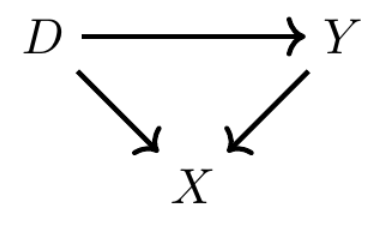

### 3.1.3 Backdoor criterion

There are two types of causal effect, i) Direct and ii) Indirect (backdoor). If backdoor has collider variable then it's called closed backdoor path and in such cases we can directly observe the effect of D on Y without controlling for X, however, if that is not the case then we have to "control for" confounding variable X.



When all backdoor paths have been closed, we say that you have come up with a research design that satisfies the backdoor criterion

<B>A set of variables satisfies the backdoor criterion in a DAG if and only if X blocks every path between confounders that contain an arrow from D to Y.<\B>

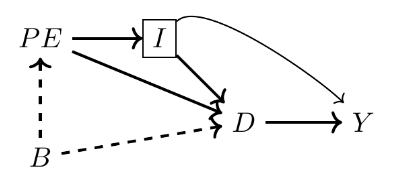

In above example since I is not collider, we have to control for I to check effect of D on Y

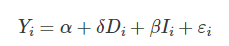

However, let's consider a different example of DAG

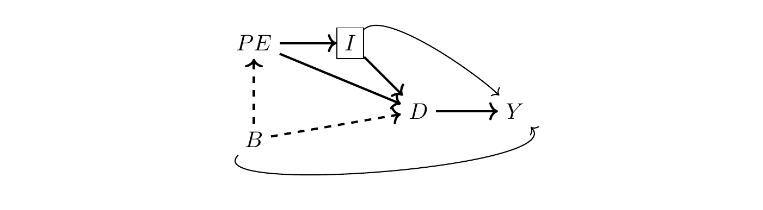

Here, since we have direct effect of B on Y, we have second backdoor i.e., D <- B -> Y, which is not collider. Since B is unobserved, we cannot say much more about the partial correlation between D and Y. We just are not legally allowed to interpret $\delta$ from our regression as the causal effect of D on Y.

### 3.1.4 More examples of collider bias

Consider following example:

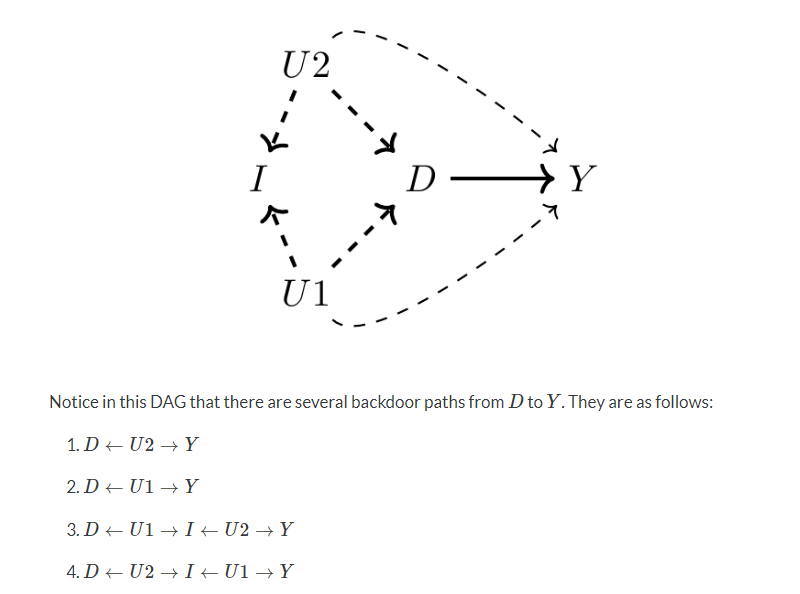

1. and 2. are open-backdoor paths and they cannot be closed since U1 and U2 are unobserved. Conditioning on I does not help, rather it makes prediction worse since we are controling for collider. 

### 3.1.5 Discrimination and collider bias

Let’s examine a real-world example around the problem of gender discrimination in labor-markets. It is common to hear that once occupation or other characteristics of a job are conditioned on, the wage disparity between genders disappears or gets smaller. For instance, critics once claimed that Google systematically underpaid its female employees. But Google responded that its data showed that when you take “location, tenure, job role, level and performance” into consideration, women’s pay is basically identical to that of men. In other words, controlling for characteristics of the job, women received the same pay.

But what if one of the ways gender discrimination creates gender disparities in earnings is through occupational sorting? If discrimination happens via the occupational match, then naïve contrasts of wages by gender controlling for occupation characteristics will likely understate the presence of discrimination in the marketplace. Let me illustrate this with a DAG based on a simple occupational sorting model with unobserved heterogeneity.

F -> Gender, D -> Discrimination, Y -> Earning, O -> Occupation, A -> Aboloty (Unoberseved)

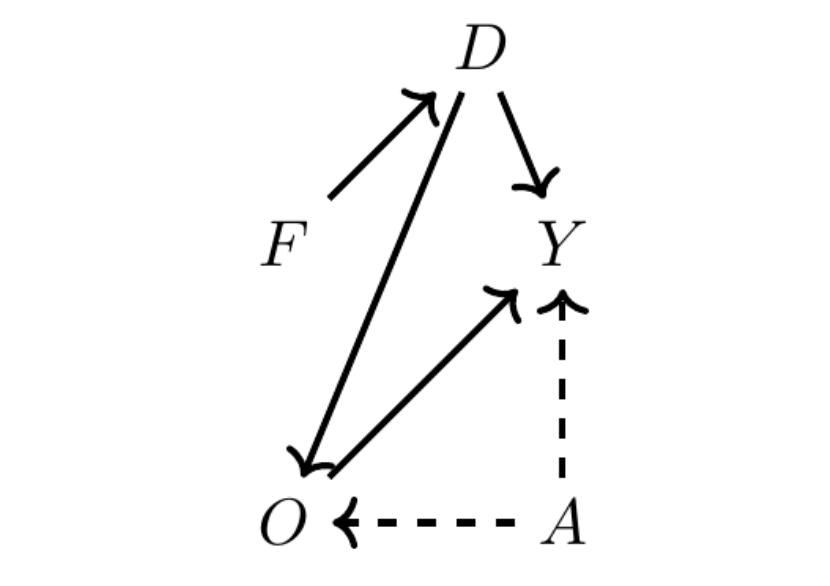

Notice that there is in fact no effect of female gender on earnings; women are assumed to have productivity identical to that of men. Thus, if we could control for discrimination, we’d get a coefficient of zero as in this example because women are, initially, just as productive as men.

But in this example, we aren’t interested in estimating the effect of being female on earnings; we are interested in estimating the effect of discrimination itself. Now you can see several noticeable paths between discrimination and earnings. They are as follows:

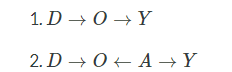

1. is not a backdoor path, it is a mediation through occupation before discrimination has an effect on earning. This would imply that women are discriminated against, which in turn affects which jobs they hold, and as a result of holding marginally worse jobs, women are paid less. 

2. relates to that channel but is slightly more complicated. In this path, unobserved ability affects both which jobs people get and their earnings


So let’s say we regress Y onto D, our discrimination variable. This yields the total effect of discrimination as the weighted sum of both the direct effect of discrimination on earnings and the mediated effect of discrimination on earnings through occupational sorting. But say that we want to control for occupation because we want to compare men and women in similar jobs. Well, controlling for occupation in the regression closes down the mediation channel, but it then opens up the second channel. Because O is a collider in second path

In [6]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
from stargazer.stargazer import Stargazer

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)


In [8]:
tb = pd.DataFrame({
    'female': np.random.binomial(1, .5, size=10000),
    'ability': np.random.normal(size=10000)})
tb['discrimination'] = tb.female.copy()
tb['occupation'] = 1 + 2*tb['ability'] + 0*tb['female'] - 2*tb['discrimination'] + np.random.normal(size=10000)
tb['wage'] = 1 - 1*tb['discrimination'] + 1*tb['occupation'] + 2*tb['ability'] + np.random.normal(size=10000) 



Occupations are increasing in unobserved ability but decreasing in discrimination. 

Wages are decreasing in discrimination but increasing in higher-quality jobs and higher ability. Thus, we know that discrimination exists in this simulation because we are hard-coding it that way with the negative coefficients both the occupation and wage processes.

In [9]:
lm_1 = sm.OLS.from_formula('wage ~ female', data=tb).fit()
lm_2 = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
lm_3 = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()


st = Stargazer((lm_1,lm_2,lm_3))
st.custom_columns(["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1])
st

First note that when we simply regress wages onto gender, we get a large negative effect, which is the combination of the direct effect of discrimination on earnings and the indirect effect via occupation. But if we run the regression that Google and others recommend wherein we control for occupation, the sign on gender changes. It becomes positive! We know this is wrong because we hard-coded the effect of gender to be 
! The problem is that occupation is a collider. It is caused by ability and discrimination. If we control for occupation, we open up a backdoor path between discrimination and earnings that is spurious and so strong that it perverts the entire relationship. So only when we control for occupation and ability can we isolate the direct causal effect of gender on wages.

### 3.1.6 Sample selection and collider bias

Bad controls are not the only kind of collider bias to be afraid of, though. Collider bias can also be baked directly into the sample if the sample itself was a collider. That’s no doubt a strange concept to imagine, so I have a funny illustration to clarify what I mean.

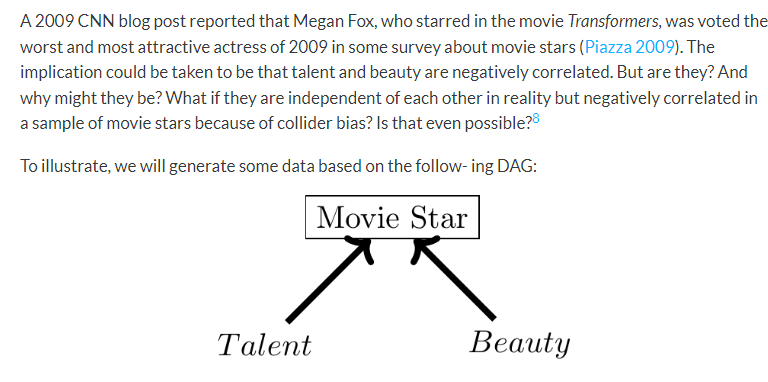

In [20]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
from stargazer.stargazer import Stargazer

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)


In [21]:
start_is_born = pd.DataFrame({
    'beauty': np.random.normal(size=2500),
    'talent': np.random.normal(size=2500)})
    
start_is_born['score'] = start_is_born['beauty'] + start_is_born['talent']
start_is_born['c85'] = np.percentile(start_is_born['score'], q=85)
start_is_born['star'] = 0
start_is_born.loc[start_is_born['score']>start_is_born['c85'], 'star'] = 1
start_is_born.head()

AttributeError: 'Index' object has no attribute '_format_flat'

     beauty    talent     score       c85  star
0 -0.131458 -0.533592 -0.665050  1.488204     0
1  0.944887 -0.653666  0.291221  1.488204     0
2 -0.668620  0.336790 -0.331830  1.488204     0
3 -1.407207 -0.658911 -2.066118  1.488204     0
4  1.051924 -0.549239  0.502685  1.488204     0

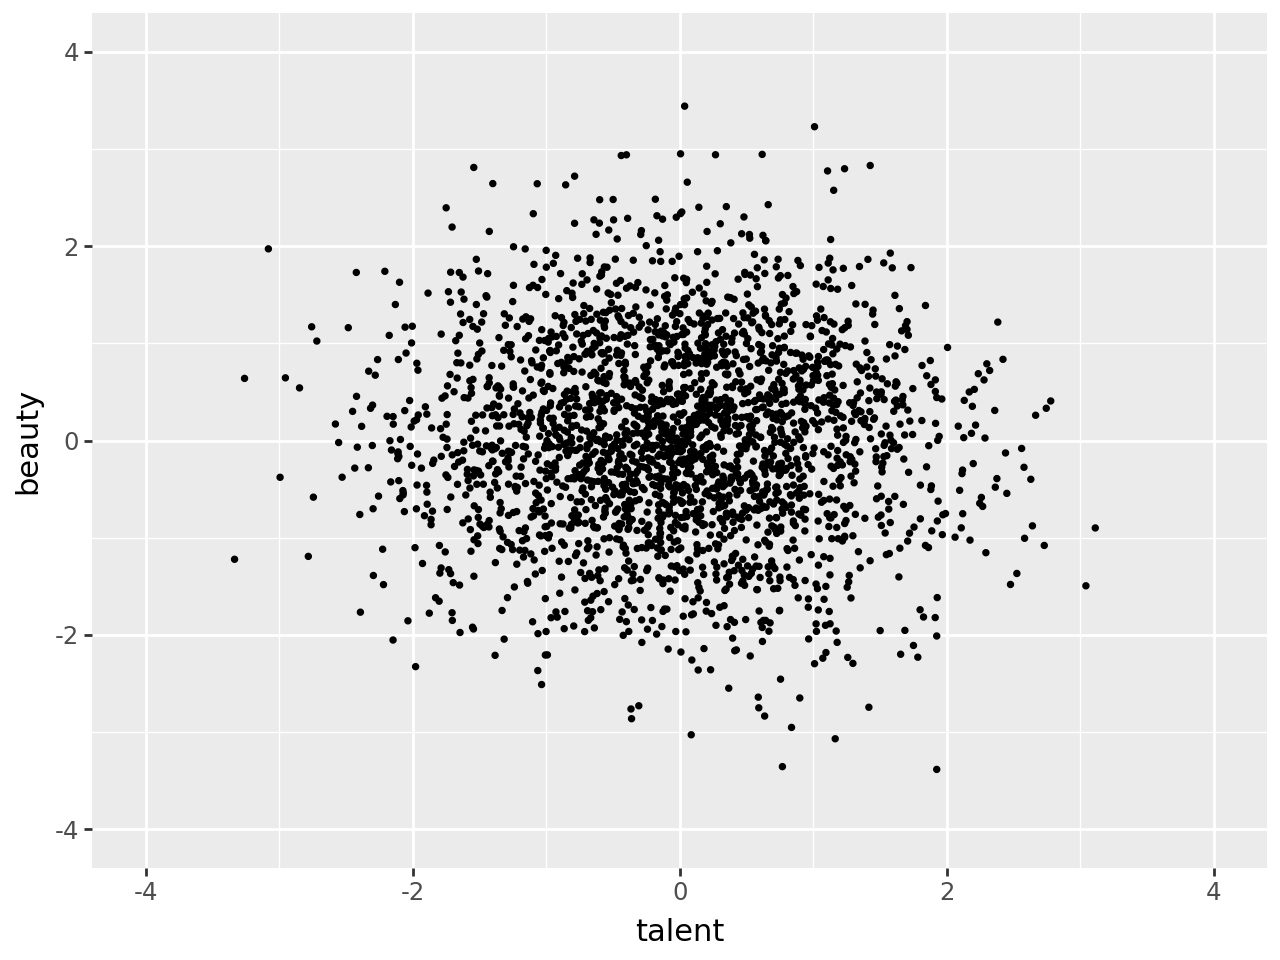

In [27]:
lm = sm.OLS.from_formula('beauty ~ talent', data=start_is_born).fit()

p.ggplot(start_is_born, p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)

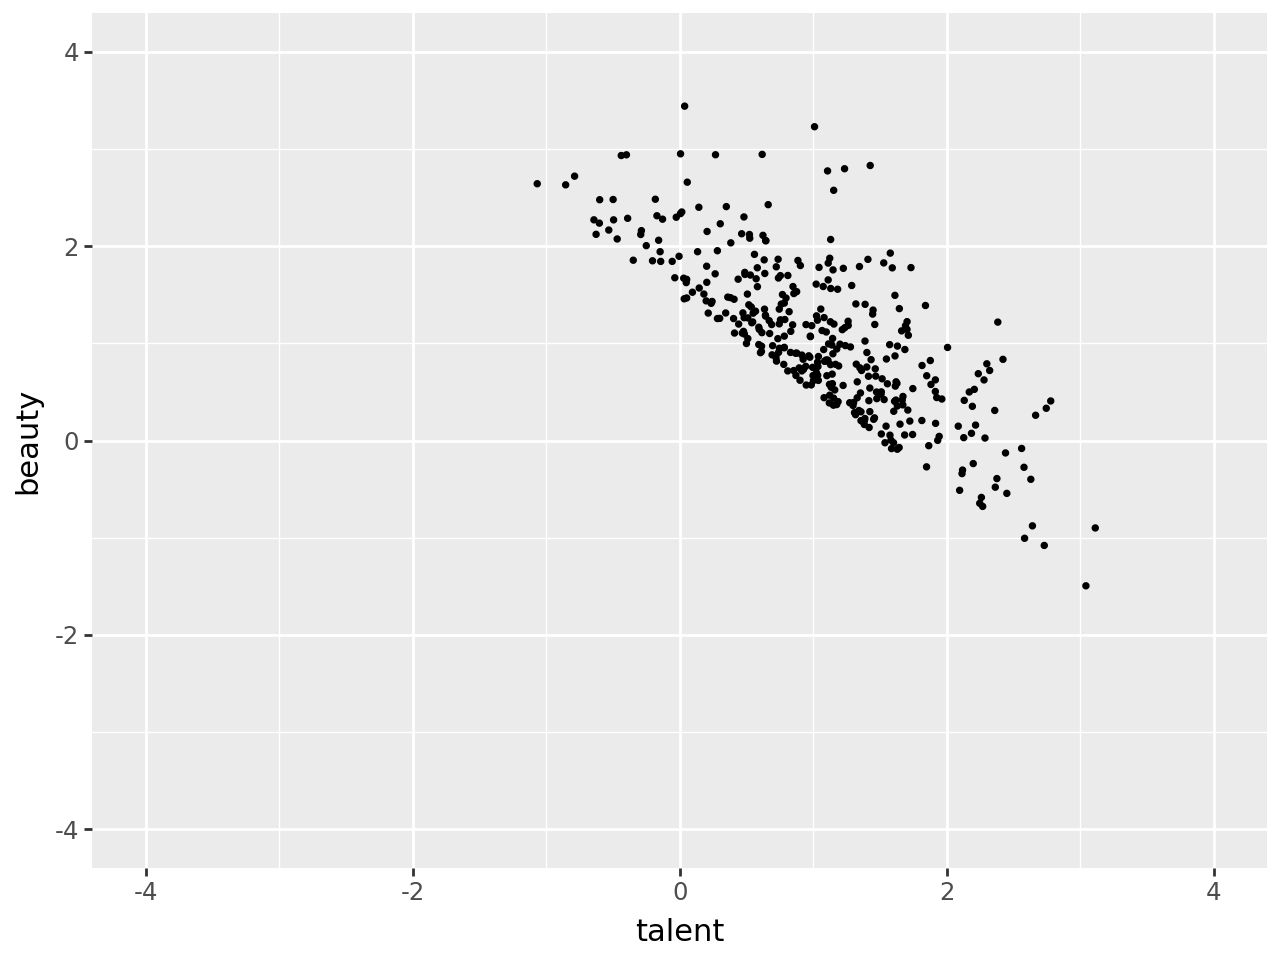

In [25]:
p.ggplot(start_is_born[start_is_born.star==1], p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)

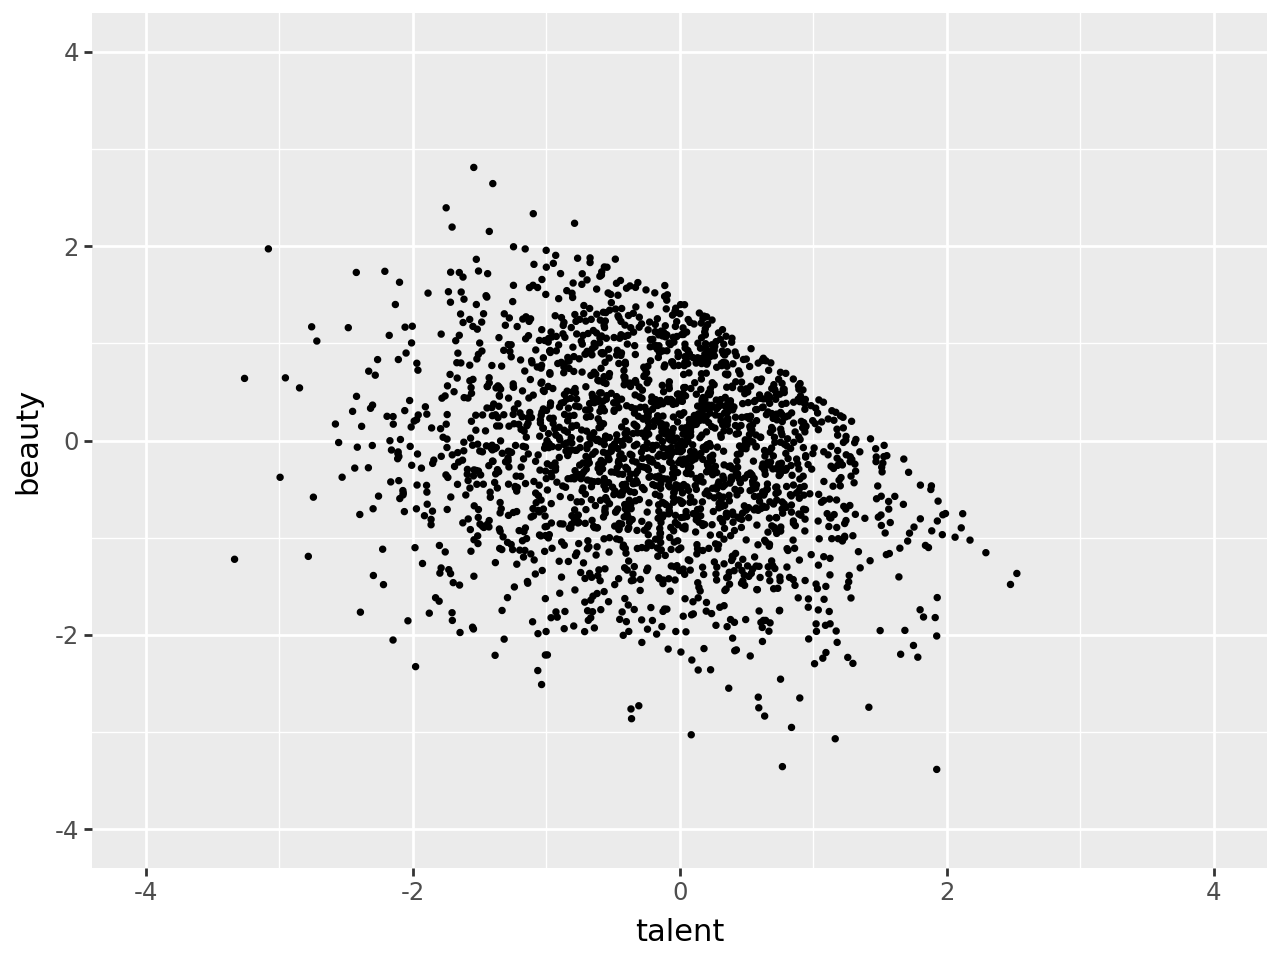

In [26]:
p.ggplot(start_is_born[start_is_born.star==0], p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)

These individual samples show negative correlation however, in reality there is no correlation between talent and beauty. The effect is purely due to sampling effect

### 3.1.7 Collider bias and police use of force

A few facts are important to note. First, using the stop-and-frisk data, Fryer finds that blacks and Hispanics were more than 50 percent more likely to have an interaction with the police in the raw data. The racial difference survives conditioning on 125 baseline characteristics, encounter characteristics, civilian behavior, precinct, and year fixed effects. In his full model, blacks are 21 percent more likely than whites to be involved in an interaction with police in which a weapon is drawn (which is statistically significant). These racial differences show up in the Police-Public Contact Survey as well, only here the racial differences are considerably larger. So the first thing to note is that the actual stop itself appears to be larger for minorities, which I will come back to momentarily.

Things become surprising when Fryer moves to his rich administrative data sources. He finds that conditional on a police interaction, there are no racial differences in officer-involved shootings. In fact, controlling for suspect demographics, officer demographics, encounter characteristics, suspect weapon, and year fixed effects, blacks are 27 percent less likely to be shot at by police than are nonblack non-Hispanics. The coefficient is not significant, and it shows up across alternative specifications and cuts of the data. Fryer is simply unable with these data to find evidence for racial discrimination in officer-involved shootings.

 But the study is not without issues that could cause a skeptic to take issue. Perhaps the police departments most willing to cooperate with a study of this kind are the ones with the least racial bias, for instance. In other words, maybe these are not the departments with the racial bias to begin with.9 Or perhaps a more sinister explanation exists, such as records being unreliable because administrators 

Perhaps the administrative datasource is endogenous because of conditioning on a collider. If so, then the administrative data itself may have the racial bias baked into it from the start. Let me explain with a DAG.



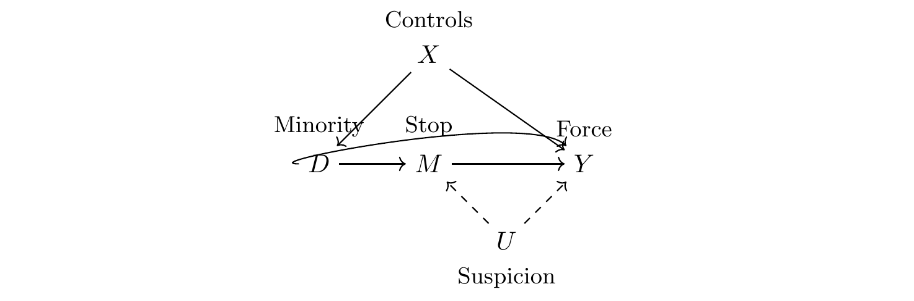

Fryer showed that minorities were more likely to be stopped using both the stop-and-frisk data and the Police-Public Contact Survey. So we know already that the D -> M pathway exists. In fact, it was a very robust correlation across multiple studies. Minorities are more likely to have an encounter with the police. Fryer’s study introduces extensive controls about the nature of the interaction, time of day, and hundreds of factors that I’ve captured with X. Controlling for
X allows Fryer to shut this backdoor path.

Yet what this DAG shows is that if police stop people who they believe are suspicious and use force against people they find suspicious, then conditioning on the stop is equivalent to conditioning on a collider. It opens up the 
D -> M <- U -> Y
 mediated path, which introduces spurious patterns into the data that, depending on the signs of these causal associations, may distort any true relationship between police and racial differences in shootings.